## Testing the Object Oriented Paradigm

In [1]:
from ga_params_class import GAParams
from hashin_sktrikman_class import HashinShtrikman
from population_class import Population
from genetic_string_class import GeneticString

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
HS = HashinShtrikman()

In [11]:
consolidated_dict = HS.generate_final_dict()

2024-01-26 12:50:43,953 - hs_logger - INFO - self.fields: {'material_id': [], 'is_stable': [], 'band_gap': [], 'is_metal': [], 'formula': [], 'mp-ids-contrib': [], 'elec_cond_300K_low_doping': [], 'therm_cond_300K_low_doping': [], 'e_electronic': [], 'e_ionic': [], 'e_total': [], 'n': [], 'bulk_modulus': [], 'shear_modulus': [], 'universal_anisotropy': [], 'total_magnetization': [], 'total_magnetization_normalized_vol': [], 'e_ij_max': []}


In [7]:
HS.set_HS_optim_params()

lower bounds: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
upper bounds: [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 1, 1]
S = 200
upper_bounds_for_loop: [1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1, 1]
ERROR! Session/line number was not unique in database. History logging moved to new session 133
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
10

In [8]:
HS.print_table_of_best_designs()


HASHIN-SHTRIKMAN + GENETIC ALGORITHM RECOMMENDED MATERIAL PROPERTIES
                                                           Gamma, the avergaing parameter, []    (Phase 1) Volume fraction, []          Cost    (Phase 1) Total dielectric constant, [F/m]    (Phase 2) Total dielectric constant, [F/m]    (Phase 1) Ionic contrib dielectric constant, [F/m]    (Phase 2) Ionic contrib dielectric constant, [F/m]    (Phase 1) Electronic contrib dielectric constant, [F/m]    (Phase 2) Electronic contrib dielectric constant, [F/m]    (Phase 1) Dielectric n, [F/m]    (Phase 2) Dielectric n, [F/m]    (Phase 1) Bulk modulus, [GPa]    (Phase 2) Bulk modulus, [GPa]    (Phase 1) Shear modulus, [GPa]    (Phase 2) Shear modulus, [GPa]    (Phase 1) Universal anisotropy, []    (Phase 2) Universal anisotropy, []    (Phase 1) Total magnetization, []    (Phase 2) Total magnetization, []    (Phase 1) Total magnetization normalized volume, []    (Phase 2) Total magnetization normalized volume, []    (Phase 1

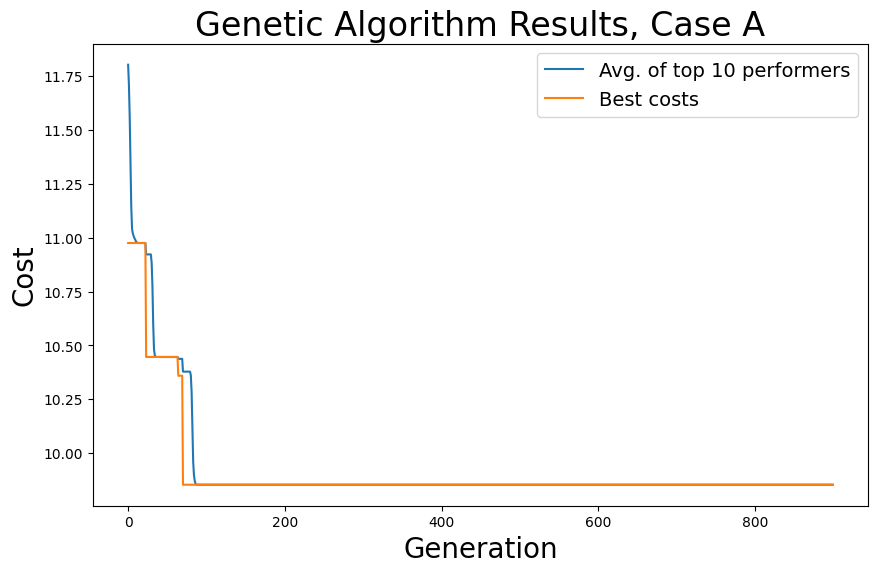

In [9]:
HS.plot_optimization_results()

In [11]:
HS.get_material_matches()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[11], line 1
----> 1 HS.get_material_matches()

File ~/Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/hashin_sktrikman_class.py:225, in HashinShtrikman.get_material_matches(self)
    197 mat_1_dict = {"mp-ids": [],
    198               "mp-ids-contrib": [], 
    199               "formula": [],
   (...)
    212               "e_ij": [],
    213               }
    215 # (Material 2) Filter the dictionary extracted from MP-API based on GA results
    216 mat_2_dict = {"mp-ids": [],
    217               "mp-ids-contrib": [], 
    218               "formula": [],
    219               "metal": [],
    220               "elec_cond_300K_low_doping": [],
    221               "therm_cond_300K_low_doping": [],
    222               "e_total": [],
    223               "e_ionic": [],
    224               "e_electro